Path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


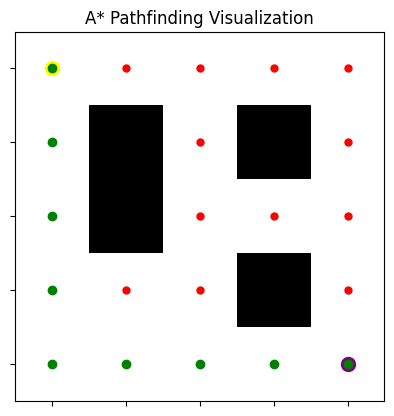

In [23]:
import heapq
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define the Node class
class Node:
    def __init__(self, position, g=0, h=0, parent=None):
        self.position = position
        self.g = g  # cost from start to current node
        self.h = h  # heuristic (estimated cost from current node to goal)
        self.f = g + h  # total cost
        self.parent = parent

    def __lt__(self, other):
        return self.f < other.f


def a_star(grid, start, goal):
    open_list = []
    closed_list = set()
    open_list_map = {}  # To track nodes added to open_list

    start_node = Node(start, 0, heuristic(start, goal))
    goal_node = Node(goal)

    heapq.heappush(open_list, start_node)
    open_list_map[start] = start_node

    while open_list:
        current_node = heapq.heappop(open_list)
        closed_list.add(current_node.position)

        if current_node.position == goal:
            path = []
            while current_node:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1], open_list_map, closed_list
              # Return reversed path, open list, and closed list

        for neighbor in get_neighbors(current_node.position, grid):
            if neighbor in closed_list:
                continue

            g_cost = current_node.g + 1
            h_cost = heuristic(neighbor, goal)
            neighbor_node = Node(neighbor, g_cost, h_cost, current_node)

            if neighbor not in open_list_map or open_list_map[neighbor].f > neighbor_node.f:
                heapq.heappush(open_list, neighbor_node)
                open_list_map[neighbor] = neighbor_node

    return None, open_list_map, closed_list


def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def get_neighbors(position, grid):
    x, y = position
    neighbors = []
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] == 0:
            neighbors.append((nx, ny))

    return neighbors


def visualize(grid, path, open_list_map, closed_list):
    # Create a colormap for visualization
    cmap = mcolors.ListedColormap(['white', 'black', 'blue', 'red', 'green'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]  # Mapping to grid colors
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()

    # Create the grid
    grid_image = [[1 if cell == 1 else 0 for cell in row] for row in grid]
    ax.imshow(grid_image, cmap=cmap, norm=norm)

    # Mark start and goal positions
    ax.plot(path[0][1], path[0][0], marker='o', color='yellow', markersize=10)  # Start
    ax.plot(path[-1][1], path[-1][0], marker='o', color='purple', markersize=10)  # Goal

    # Mark the path
    for node in path:
        ax.plot(node[1], node[0], marker='o', color='green', markersize=6)

    # Mark open list (explored nodes)
    for node in open_list_map:
        if node not in closed_list:
            ax.plot(node[1], node[0], marker='o', color='blue', markersize=5)

    # Mark closed list (visited nodes)
    for node in closed_list:
        if node not in path:
            ax.plot(node[1], node[0], marker='o', color='red', markersize=5)

    ax.set_xticks(range(len(grid[0])))
    ax.set_yticks(range(len(grid)))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_title("A* Pathfinding Visualization")

    plt.show()


# Example grid (0 is walkable, 1 is blocked)
grid = [
    [0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

# Start and goal positions
start = (0, 0)
goal = (4, 4)

# Run A* algorithm
path, open_list_map, closed_list = a_star(grid, start, goal)

if path:
    print("Path:", path)
    visualize(grid, path, open_list_map, closed_list)
else:
    print("No path found!")
